In [1]:
# Practice Project - Salaries

import pandas as pd
df=pd.read_csv('salaries.csv')
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [2]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [3]:
df.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [4]:
df.sample()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
300,Prof,A,39,36,Male,88600


In [5]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:>

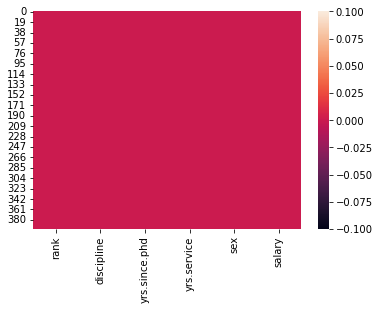

In [8]:
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='rank', ylabel='salary'>

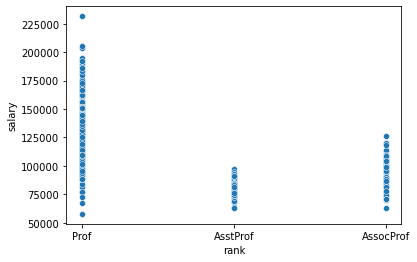

In [9]:
sns.scatterplot(df['rank'],df['salary'])

<AxesSubplot:xlabel='discipline', ylabel='salary'>

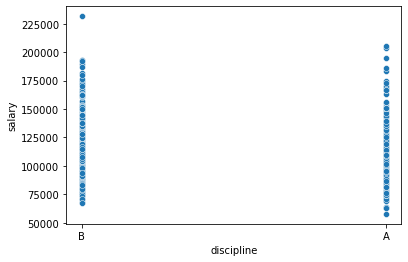

In [10]:
sns.scatterplot(df['discipline'],df['salary'])

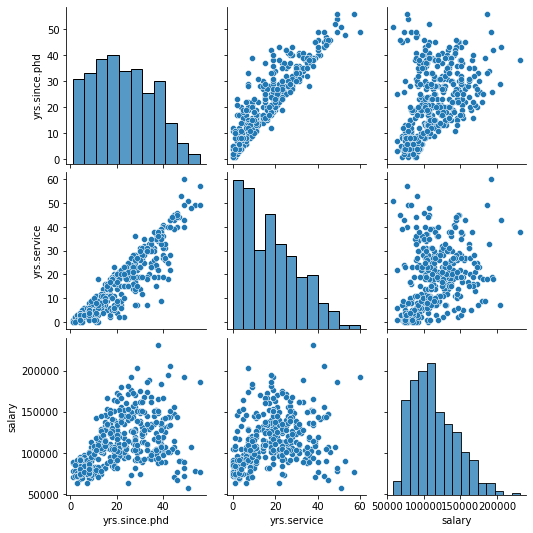

In [11]:
sns.pairplot(df)

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

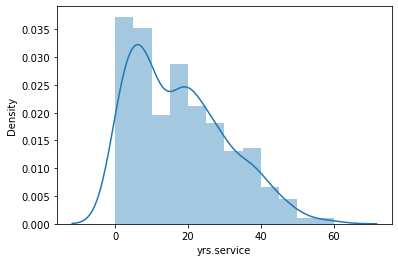

In [12]:
sns.distplot(df['yrs.service'])

In [13]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

list1=['rank','discipline','sex']
for i in list1:
    df[i]=le.fit_transform(df[i].astype(str))


In [14]:
df.head(10)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
5,0,1,6,6,1,97000
6,2,1,30,23,1,175000
7,2,1,45,45,1,147765
8,2,1,21,20,1,119250
9,2,1,18,18,0,129000


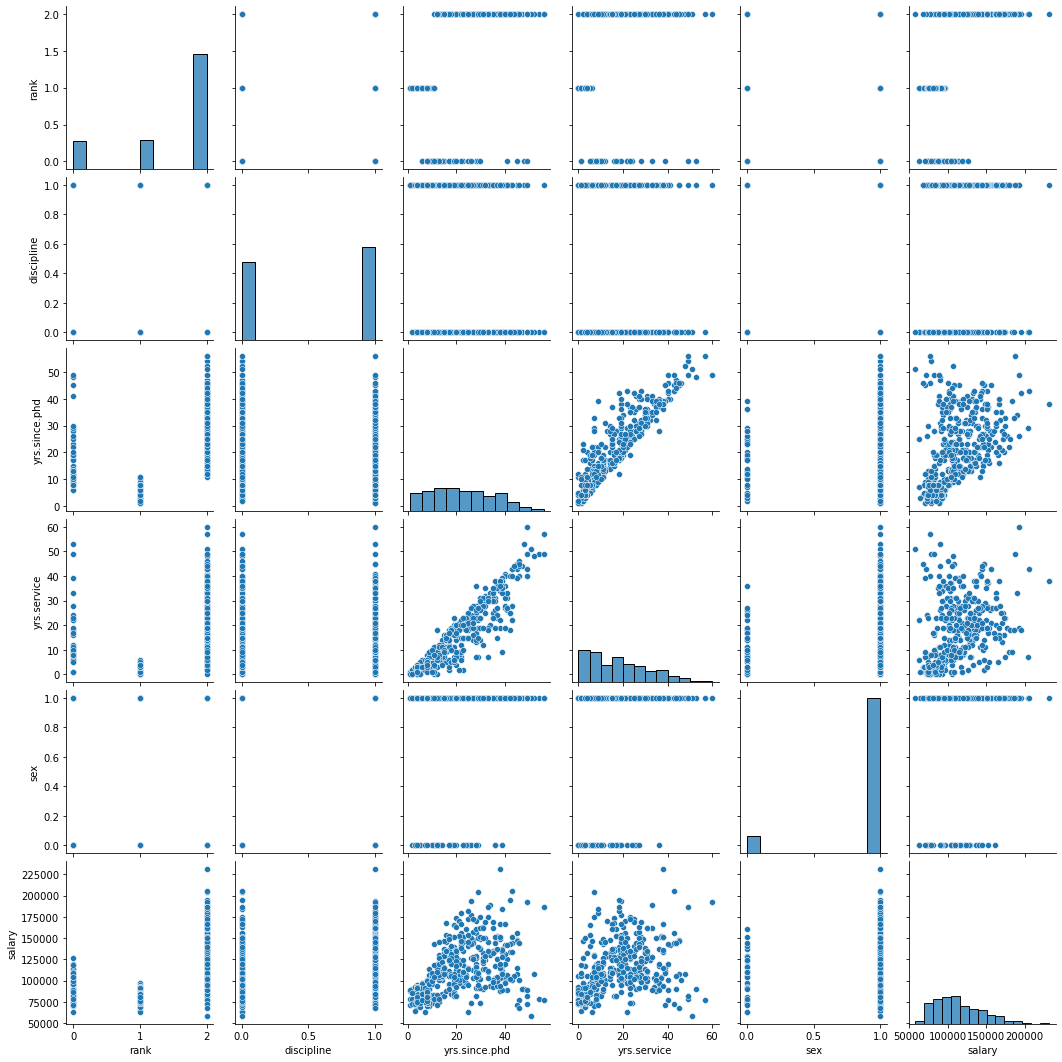

In [15]:
sns.pairplot(df)

In [16]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

there is a skewness in the rank and sex column

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

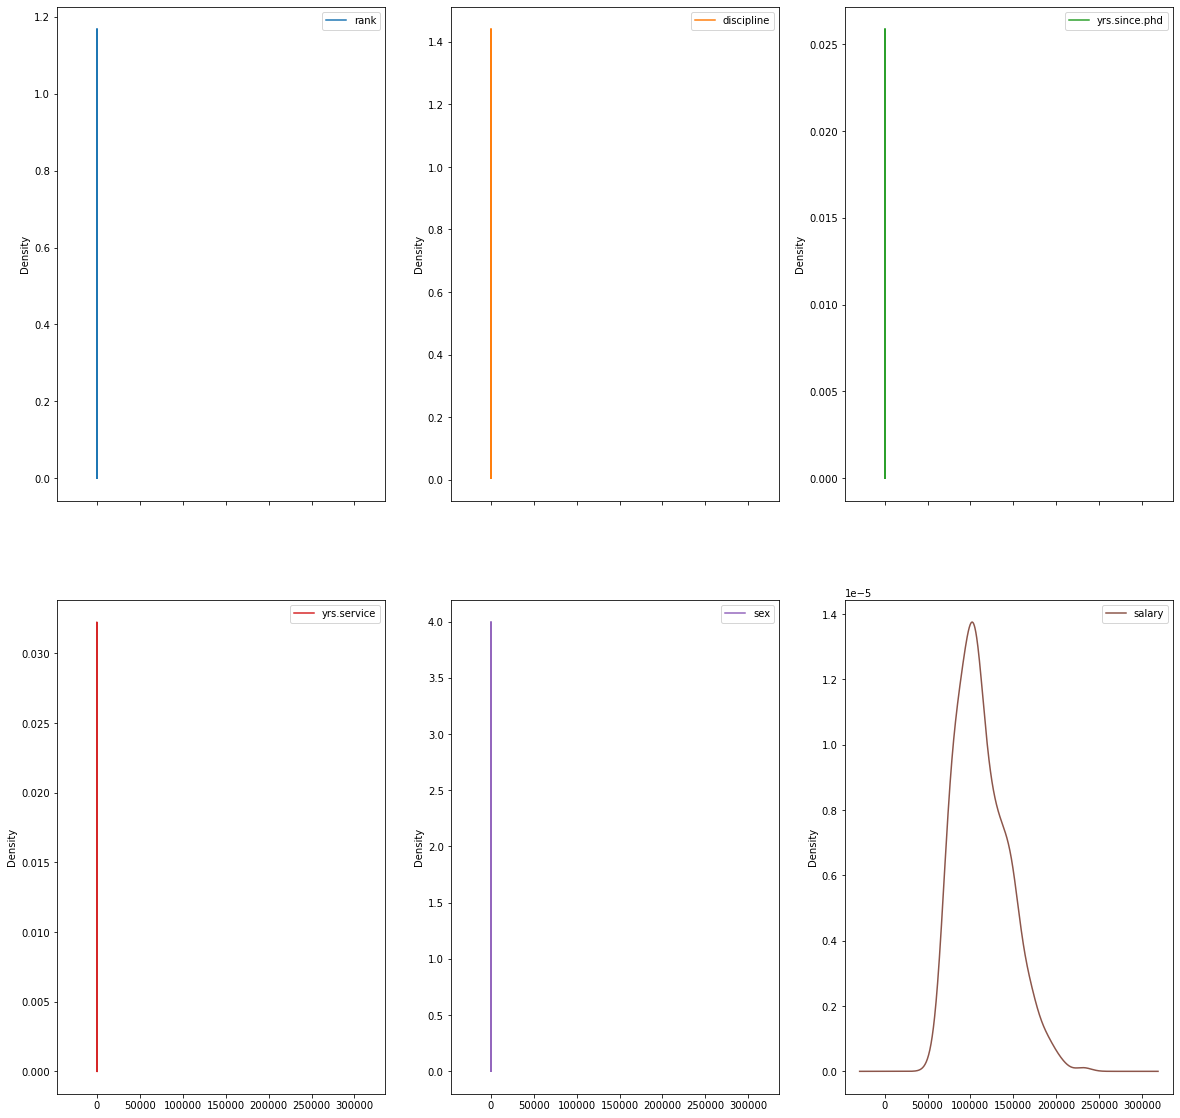

In [17]:
df.plot(kind='kde',subplots=True,layout=(2,3),figsize=(20,20))

we are not getting any beneficial information from this

rank                AxesSubplot(0.125,0.536818;0.227941x0.343182)
discipline       AxesSubplot(0.398529,0.536818;0.227941x0.343182)
yrs.since.phd    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
yrs.service            AxesSubplot(0.125,0.125;0.227941x0.343182)
sex                 AxesSubplot(0.398529,0.125;0.227941x0.343182)
salary              AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

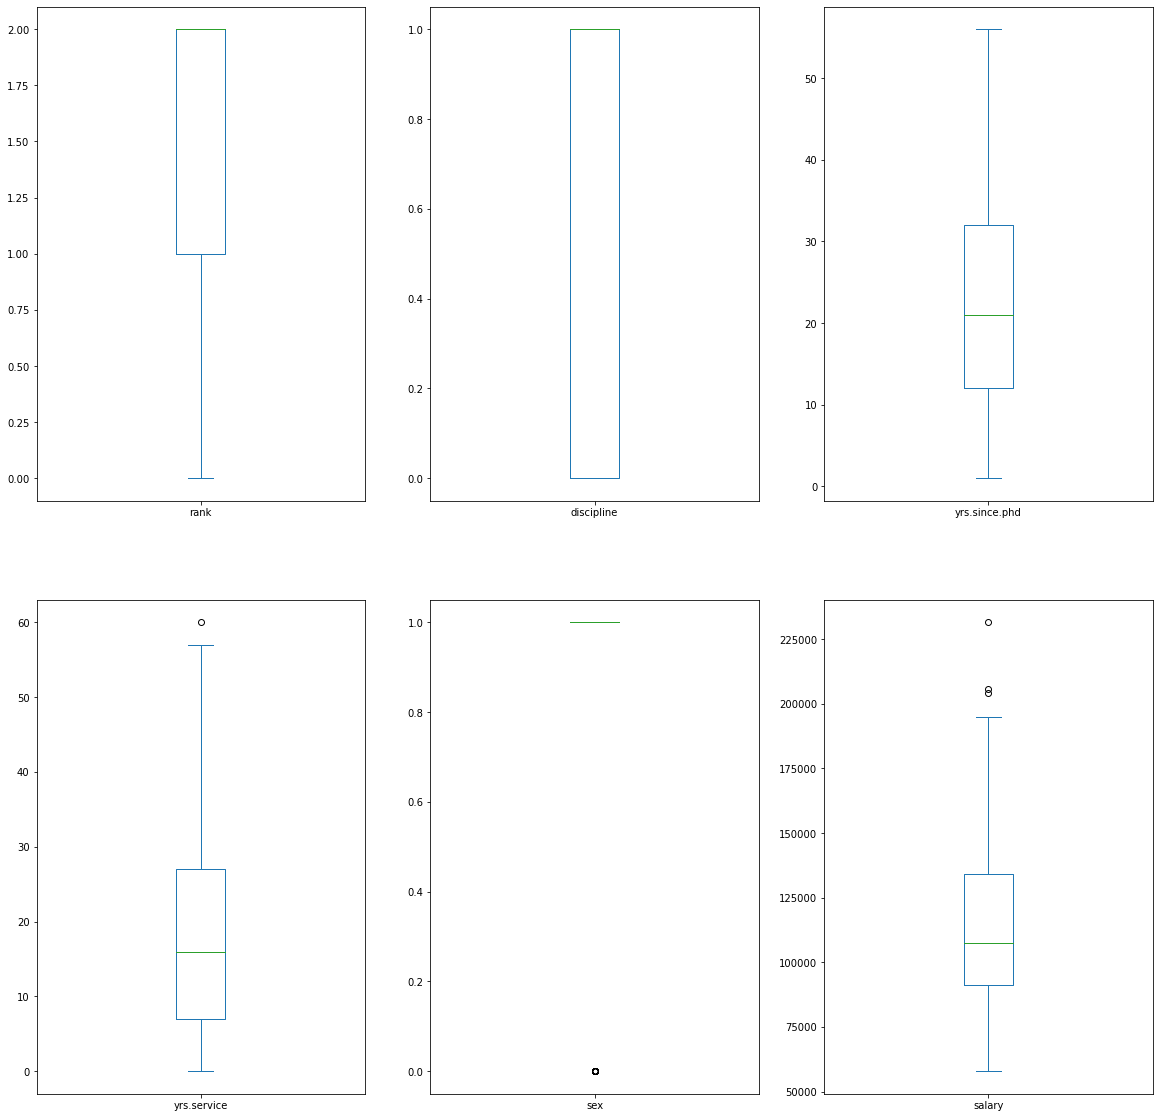

In [18]:
df.plot(kind='box',subplots=True,layout=(2,3),figsize=(20,20))

this shows there are very less outliers in the data

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

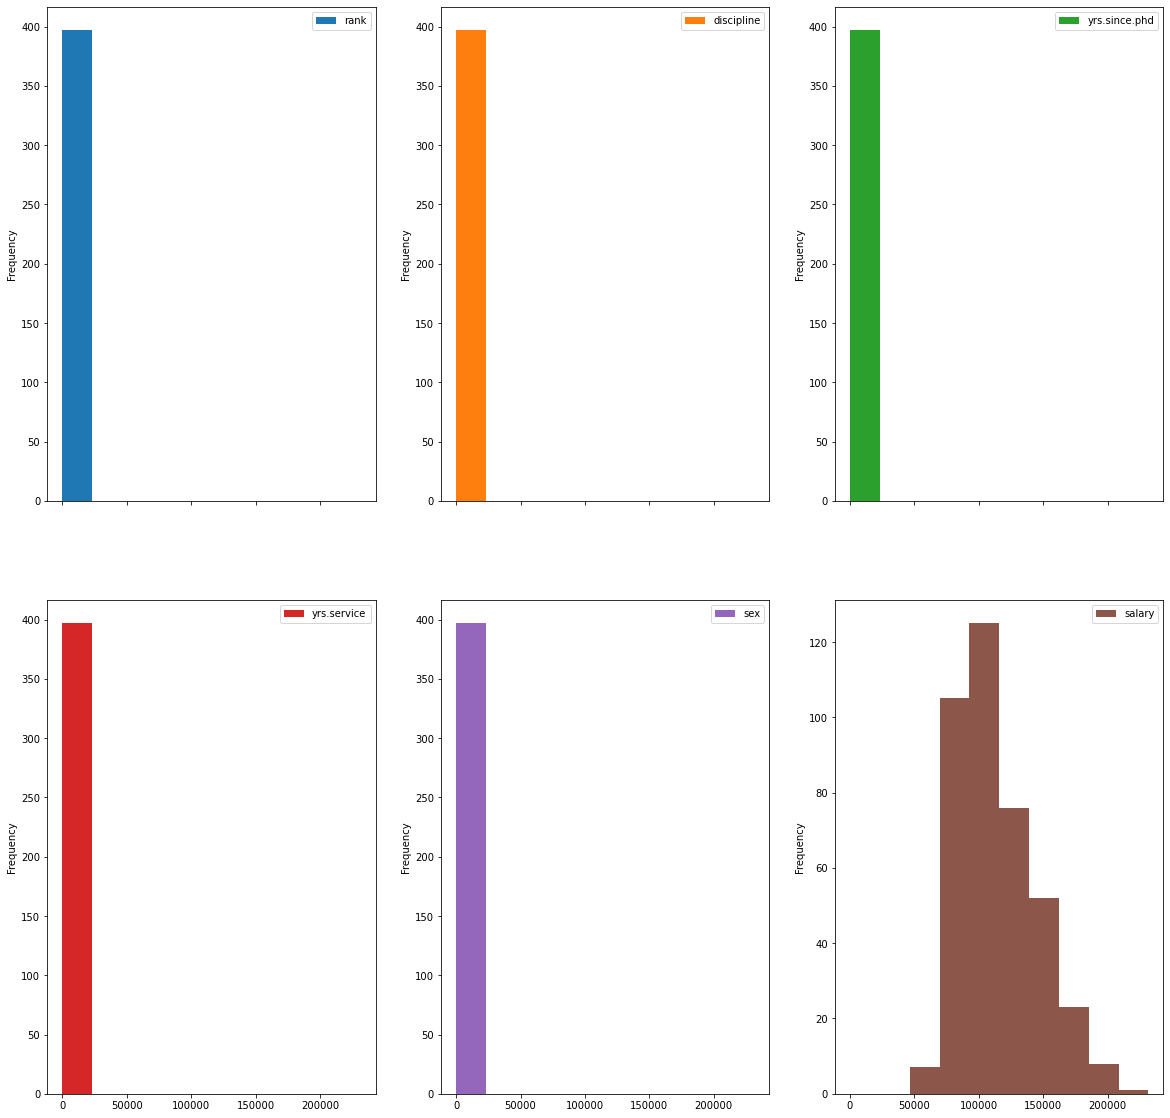

In [19]:
df.plot(kind='hist',subplots=True,layout=(2,3),figsize=(20,20))

In [20]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


it shows that there are outliers present in yrs.service & salary column

<AxesSubplot:xlabel='rank', ylabel='Density'>

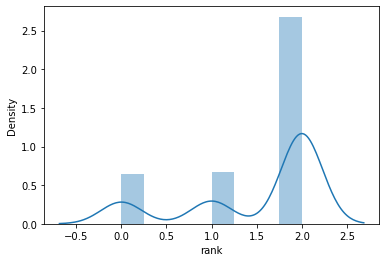

In [21]:
sns.distplot(df['rank'])

<AxesSubplot:xlabel='sex', ylabel='Density'>

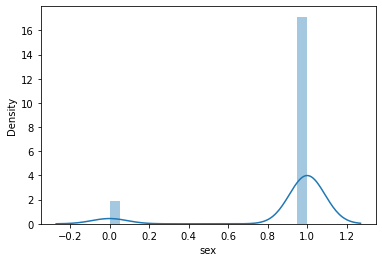

In [22]:
sns.distplot(df['sex'])

In [26]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z


,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,0.649257,0.915403,0.257550,0.029669,0.330058,0.860919
1,0.649257,0.915403,0.179854,0.124300,0.330058,1.966672
2,0.672564,0.915403,1.422982,1.125098,0.330058,1.122495
3,0.649257,0.915403,1.762533,1.646343,0.330058,0.042760
4,0.649257,0.915403,1.374055,1.800312,0.330058,0.918768
...,...,...,...,...,...,...
392,0.649257,1.092415,0.830187,0.953483,0.330058,0.350418
393,0.649257,1.092415,0.674796,0.106654,0.330058,1.218396
394,0.649257,1.092415,1.529446,0.568560,0.330058,0.395640
395,0.649257,1.092415,0.208623,0.201284,0.330058,0.607502


In [27]:
threshold=3
print(np.where(z>3))

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
       103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
       230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
       341, 358, 361, 364], dtype=int64), array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
      dtype=int64))


In [28]:
df_new=df[(z<3).all(axis=1)] #removing outliers

In [29]:
df=df_new
df.shape

(354, 6)

Now the outliers are removed from the data

In [30]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.095962,0.524310,0.446604,NaN,0.515398
discipline,-0.095962,1.000000,-0.233685,-0.185759,NaN,0.127542
yrs.since.phd,0.524310,-0.233685,1.000000,0.908046,NaN,0.386818
yrs.service,0.446604,-0.185759,0.908046,1.000000,NaN,0.284771
sex,NaN,NaN,NaN,NaN,NaN,NaN
salary,0.515398,0.127542,0.386818,0.284771,NaN,1.000000


<AxesSubplot:>

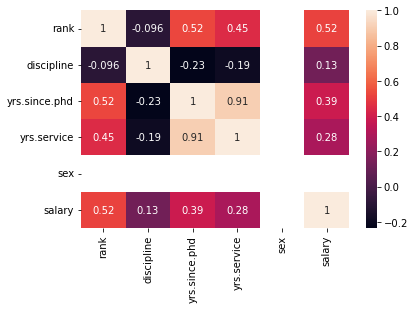

In [31]:
sns.heatmap(df.corr(),annot=True)

this implies sex doesn't affect the salary outcome so we can remove this from the data

In [32]:
df.drop('sex',axis=1,inplace=True)
df.head()

,rank,discipline,yrs.since.phd,yrs.service,salary
0,2,1,19,18,139750
1,2,1,20,16,173200
2,1,1,4,3,79750
3,2,1,45,39,115000
4,2,1,40,41,141500


In [33]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [35]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,random_state=45,test_size=.20)

In [36]:
lr=LinearRegression()
lr.fit(x_train,y_train)
prd=lr.predict(x_test)
print('Coefficient - ',lr.coef_)
print('Score - ',lr.score(x_train,y_train))

Coefficient -  [15723.98310576 13583.26320271  1261.58519989  -833.4131388 ]
Score -  0.3488392213681337


In [37]:
print('Actual Result',y_test)
print('Predicted Result',prd)

Actual Result 22      93904
305    111350
85     132825
376     74856
113    104279
        ...  
164     88795
220    170000
194     90000
294    107300
117    117515
Name: salary, Length: 71, dtype: int64
Predicted Result [118513.46712569 116418.468787   121461.22175129  89110.90904842
 116464.33075376 125318.35813637 125314.7703011  114300.53946493
 100599.17391245 123196.84097903 130498.69700095 105645.514712
 112519.05827042 104383.92951211 117320.67487594 116395.53780362
 121778.32673074 104678.24391058 122340.49685685  88728.7393565
  88277.49590962 122768.66891794 132746.69560014 112358.68178915
 100193.93283474 121055.98067358 106073.68677309 120272.01733681
  80956.43714199 108329.06159305 124909.52922339  92490.42357038
 125223.04636757 131936.21344473  82894.84738491 138473.44927799
 111211.61110377 122340.49685685 140094.41358882 106616.37334869
 135361.58993345 119461.53518139 127952.59561779 121438.29076791
 140430.86171638 117725.91595365 121350.15466965 130361.11110066

In [39]:
print('error:')

print('mean absolute error: ',mean_absolute_error(y_test,prd))
print('mean squared error: ',mean_squared_error(y_test,prd))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,prd)))

error:
mean absolute error:  18786.125559104577
mean squared error:  517023144.21214575
root mean squared error:  22738.14293675158
